In [155]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Input, Dense, LSTM, Dropout
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import randint
import argparse

In [156]:
data = pd.read_excel('final_version.xlsx', header=None)
data = data.to_numpy()[1:]


In [157]:
idx = 0
X, Y = [], []
while True:
    if idx+15 >= len(data):
        break
    X.append(data[idx:idx+15])
    Y.append(data[idx+15])
    idx += 1
X = np.array(X)
Y = np.array(Y)


In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [159]:
X_train = np.array(X_train)[:, :, [1, 3, 4]]
Y_train = np.array(Y_train)[:, -1].reshape(-1, 1)
X_test = np.array(X_test)[:, :, [1, 3, 4]]
Y_test = np.array(Y_test)[:, -1].reshape(-1, 1)


In [160]:
X_nonzero = []
Y_nonzero = []
for i, y in enumerate(Y_train):
    if y[-1] != 0.0:
        X_nonzero.append(X_train[i])
        Y_nonzero.append(y)
        

In [161]:
X_train = np.concatenate((X_train, X_nonzero, X_nonzero, X_nonzero))
Y_train = np.concatenate((Y_train, Y_nonzero, Y_nonzero, Y_nonzero))


In [162]:
def build_model(input_shape):
    x = Input(shape=input_shape)

    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(x)
    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(h)
    # h = LSTM(20, activation='tanh', kernel_initializer='he_normal')(h)
    h = LSTM(80, activation='tanh',
             kernel_initializer='he_normal')(x)  # 128

    y = Dense(1, activation='relu')(h)
    return Model(inputs=x, outputs=y)

In [167]:
model = build_model((15, 3))
model.summary()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 15, 3)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 80)                26880     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 81        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])


In [169]:
es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=3000)
mc = ModelCheckpoint('best_model.h5', monitor='val_mae', mode='min', save_best_only=True)


In [170]:
hist = model.fit(
    X_train, Y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=3000,
    verbose=2,
    callbacks=[es, mc])


Train on 26604 samples, validate on 6651 samples
Epoch 1/3000
 - 6s - loss: 364.6892 - mae: 7.3014 - val_loss: 670.3012 - val_mae: 11.4372
Epoch 2/3000
 - 6s - loss: 331.2542 - mae: 8.0145 - val_loss: 622.3080 - val_mae: 11.4921
Epoch 3/3000
 - 5s - loss: 319.0447 - mae: 8.2178 - val_loss: 604.3753 - val_mae: 11.5538
Epoch 4/3000
 - 6s - loss: 313.1403 - mae: 8.2222 - val_loss: 595.9744 - val_mae: 11.5507
Epoch 5/3000
 - 5s - loss: 309.3268 - mae: 8.1862 - val_loss: 586.6006 - val_mae: 11.5739
Epoch 6/3000
 - 6s - loss: 306.7717 - mae: 8.2048 - val_loss: 579.8258 - val_mae: 11.6280
Epoch 7/3000
 - 5s - loss: 304.6752 - mae: 8.1754 - val_loss: 569.9580 - val_mae: 11.6469
Epoch 8/3000
 - 6s - loss: 303.0385 - mae: 8.1451 - val_loss: 567.4153 - val_mae: 11.6147
Epoch 9/3000
 - 6s - loss: 301.3748 - mae: 8.1007 - val_loss: 563.6678 - val_mae: 11.6262
Epoch 10/3000
 - 5s - loss: 299.6982 - mae: 8.0771 - val_loss: 565.5030 - val_mae: 11.5298
Epoch 11/3000
 - 5s - loss: 298.5866 - mae: 8.0492

 - 6s - loss: 148.1467 - mae: 4.9232 - val_loss: 274.6125 - val_mae: 7.9630
Epoch 92/3000
 - 5s - loss: 146.2923 - mae: 4.8884 - val_loss: 271.0406 - val_mae: 7.7524
Epoch 93/3000
 - 6s - loss: 148.0765 - mae: 4.9214 - val_loss: 270.7007 - val_mae: 7.8910
Epoch 94/3000
 - 6s - loss: 146.8549 - mae: 4.9311 - val_loss: 267.8862 - val_mae: 7.8620
Epoch 95/3000
 - 6s - loss: 147.8418 - mae: 4.9881 - val_loss: 267.6106 - val_mae: 7.8666
Epoch 96/3000
 - 6s - loss: 142.8153 - mae: 4.8569 - val_loss: 258.1589 - val_mae: 7.7212
Epoch 97/3000
 - 6s - loss: 139.6665 - mae: 4.7843 - val_loss: 262.6557 - val_mae: 7.7740
Epoch 98/3000
 - 6s - loss: 142.6921 - mae: 4.8882 - val_loss: 262.8384 - val_mae: 7.8230
Epoch 99/3000
 - 6s - loss: 137.2025 - mae: 4.7468 - val_loss: 255.4184 - val_mae: 7.7531
Epoch 100/3000
 - 6s - loss: 154.1267 - mae: 5.0892 - val_loss: 257.0168 - val_mae: 7.8223
Epoch 101/3000
 - 6s - loss: 135.9299 - mae: 4.7353 - val_loss: 245.2014 - val_mae: 7.5409
Epoch 102/3000
 - 6s -

Epoch 182/3000
 - 5s - loss: 66.8245 - mae: 3.3217 - val_loss: 130.7517 - val_mae: 5.6960
Epoch 183/3000
 - 5s - loss: 65.9547 - mae: 3.2685 - val_loss: 127.1084 - val_mae: 5.5944
Epoch 184/3000
 - 5s - loss: 64.5744 - mae: 3.2156 - val_loss: 121.1851 - val_mae: 5.4353
Epoch 185/3000
 - 5s - loss: 77.3927 - mae: 3.5644 - val_loss: 152.9752 - val_mae: 6.3678
Epoch 186/3000
 - 5s - loss: 119.6450 - mae: 4.3604 - val_loss: 161.0663 - val_mae: 6.6180
Epoch 187/3000
 - 5s - loss: 71.2325 - mae: 3.5416 - val_loss: 123.5059 - val_mae: 5.5947
Epoch 188/3000
 - 5s - loss: 64.0025 - mae: 3.2589 - val_loss: 121.0663 - val_mae: 5.4774
Epoch 189/3000
 - 5s - loss: 63.4674 - mae: 3.2243 - val_loss: 121.3959 - val_mae: 5.5214
Epoch 190/3000
 - 5s - loss: 62.6033 - mae: 3.1899 - val_loss: 118.2718 - val_mae: 5.4130
Epoch 191/3000
 - 5s - loss: 61.8055 - mae: 3.1591 - val_loss: 119.9853 - val_mae: 5.5194
Epoch 192/3000
 - 5s - loss: 61.9802 - mae: 3.1774 - val_loss: 118.9169 - val_mae: 5.4685
Epoch 193

Epoch 274/3000
 - 5s - loss: 40.7868 - mae: 2.5944 - val_loss: 84.2256 - val_mae: 4.8509
Epoch 275/3000
 - 5s - loss: 63.2185 - mae: 3.3424 - val_loss: 128.9825 - val_mae: 6.0454
Epoch 276/3000
 - 5s - loss: 66.0200 - mae: 3.4159 - val_loss: 123.2435 - val_mae: 6.1495
Epoch 277/3000
 - 5s - loss: 135.6188 - mae: 4.7029 - val_loss: 146.1017 - val_mae: 6.5321
Epoch 278/3000
 - 5s - loss: 59.7464 - mae: 3.2855 - val_loss: 87.1265 - val_mae: 4.9819
Epoch 279/3000
 - 5s - loss: 44.0465 - mae: 2.7543 - val_loss: 77.9857 - val_mae: 4.5811
Epoch 280/3000
 - 5s - loss: 39.3220 - mae: 2.5313 - val_loss: 74.2265 - val_mae: 4.3603
Epoch 281/3000
 - 5s - loss: 37.8641 - mae: 2.4410 - val_loss: 73.4959 - val_mae: 4.3109
Epoch 282/3000
 - 5s - loss: 38.8174 - mae: 2.4764 - val_loss: 74.1490 - val_mae: 4.3589
Epoch 283/3000
 - 5s - loss: 37.7945 - mae: 2.4468 - val_loss: 72.4513 - val_mae: 4.3282
Epoch 284/3000
 - 5s - loss: 37.7613 - mae: 2.4685 - val_loss: 74.2451 - val_mae: 4.4122
Epoch 285/3000
 -

Epoch 366/3000
 - 5s - loss: 29.1134 - mae: 2.1360 - val_loss: 60.0465 - val_mae: 4.0417
Epoch 367/3000
 - 6s - loss: 55.3202 - mae: 3.0571 - val_loss: 84.7262 - val_mae: 5.0704
Epoch 368/3000
 - 6s - loss: 35.8270 - mae: 2.4701 - val_loss: 59.5352 - val_mae: 4.0123
Epoch 369/3000
 - 5s - loss: 29.2705 - mae: 2.1491 - val_loss: 57.8237 - val_mae: 3.9069
Epoch 370/3000
 - 5s - loss: 28.9896 - mae: 2.1224 - val_loss: 58.8793 - val_mae: 3.9538
Epoch 371/3000
 - 5s - loss: 29.0135 - mae: 2.1248 - val_loss: 58.1307 - val_mae: 3.9412
Epoch 372/3000
 - 5s - loss: 28.6881 - mae: 2.1058 - val_loss: 57.2852 - val_mae: 3.9001
Epoch 373/3000
 - 5s - loss: 30.1320 - mae: 2.2143 - val_loss: 64.4896 - val_mae: 4.3112
Epoch 374/3000
 - 5s - loss: 64.3542 - mae: 3.2214 - val_loss: 209.0673 - val_mae: 7.6613
Epoch 375/3000
 - 5s - loss: 71.6373 - mae: 3.5379 - val_loss: 72.9610 - val_mae: 4.8012
Epoch 376/3000
 - 5s - loss: 34.6098 - mae: 2.4915 - val_loss: 63.1542 - val_mae: 4.3117
Epoch 377/3000
 - 5s

Epoch 458/3000
 - 6s - loss: 25.3064 - mae: 1.9975 - val_loss: 50.9984 - val_mae: 3.7194
Epoch 459/3000
 - 6s - loss: 24.2874 - mae: 1.9175 - val_loss: 48.8247 - val_mae: 3.5003
Epoch 460/3000
 - 5s - loss: 24.1379 - mae: 1.8972 - val_loss: 50.4456 - val_mae: 3.6542
Epoch 461/3000
 - 6s - loss: 36.3425 - mae: 2.4489 - val_loss: 89.1689 - val_mae: 5.3417
Epoch 462/3000
 - 6s - loss: 60.6997 - mae: 3.3138 - val_loss: 97.1113 - val_mae: 5.6064
Epoch 463/3000
 - 6s - loss: 36.6538 - mae: 2.6329 - val_loss: 57.9063 - val_mae: 4.2160
Epoch 464/3000
 - 6s - loss: 26.6062 - mae: 2.1366 - val_loss: 53.5782 - val_mae: 3.9423
Epoch 465/3000
 - 5s - loss: 24.6659 - mae: 1.9674 - val_loss: 50.2010 - val_mae: 3.6717
Epoch 466/3000
 - 6s - loss: 24.3851 - mae: 1.9336 - val_loss: 49.3907 - val_mae: 3.5856
Epoch 467/3000
 - 6s - loss: 24.0041 - mae: 1.8907 - val_loss: 50.1304 - val_mae: 3.6403
Epoch 468/3000
 - 5s - loss: 24.4085 - mae: 1.9253 - val_loss: 50.9187 - val_mae: 3.7305
Epoch 469/3000
 - 6s 

Epoch 550/3000
 - 3s - loss: 97.9145 - mae: 3.9778 - val_loss: 84.9564 - val_mae: 5.2313
Epoch 551/3000
 - 3s - loss: 37.4598 - mae: 2.6604 - val_loss: 62.1734 - val_mae: 4.4187
Epoch 552/3000
 - 3s - loss: 28.1673 - mae: 2.2398 - val_loss: 50.8559 - val_mae: 3.8574
Epoch 553/3000
 - 3s - loss: 23.9263 - mae: 1.9504 - val_loss: 47.1679 - val_mae: 3.5512
Epoch 554/3000
 - 3s - loss: 22.6923 - mae: 1.8445 - val_loss: 46.6255 - val_mae: 3.4972
Epoch 555/3000
 - 4s - loss: 22.3649 - mae: 1.8059 - val_loss: 46.9380 - val_mae: 3.5161
Epoch 556/3000
 - 4s - loss: 22.4993 - mae: 1.8226 - val_loss: 46.1931 - val_mae: 3.4281
Epoch 557/3000
 - 4s - loss: 22.2468 - mae: 1.7924 - val_loss: 45.9801 - val_mae: 3.4242
Epoch 558/3000
 - 3s - loss: 21.9318 - mae: 1.7681 - val_loss: 45.0870 - val_mae: 3.3113
Epoch 559/3000
 - 3s - loss: 22.3705 - mae: 1.8039 - val_loss: 48.4438 - val_mae: 3.6674
Epoch 560/3000
 - 3s - loss: 25.3343 - mae: 2.0203 - val_loss: 68.6084 - val_mae: 4.7242
Epoch 561/3000
 - 3s 

Epoch 642/3000
 - 4s - loss: 21.8491 - mae: 1.7857 - val_loss: 45.2709 - val_mae: 3.4324
Epoch 643/3000
 - 5s - loss: 21.5526 - mae: 1.7509 - val_loss: 45.4365 - val_mae: 3.4295
Epoch 644/3000
 - 3s - loss: 21.2189 - mae: 1.7172 - val_loss: 44.6633 - val_mae: 3.3386
Epoch 645/3000
 - 3s - loss: 27.1766 - mae: 2.0795 - val_loss: 116.4374 - val_mae: 6.0322
Epoch 646/3000
 - 4s - loss: 64.9580 - mae: 3.4243 - val_loss: 100.7960 - val_mae: 5.7301
Epoch 647/3000
 - 4s - loss: 56.9379 - mae: 3.2072 - val_loss: 62.6744 - val_mae: 4.5390
Epoch 648/3000
 - 4s - loss: 27.2975 - mae: 2.1984 - val_loss: 48.6003 - val_mae: 3.7650
Epoch 649/3000
 - 5s - loss: 23.5378 - mae: 1.9486 - val_loss: 47.9172 - val_mae: 3.6941
Epoch 650/3000
 - 3s - loss: 22.0873 - mae: 1.8242 - val_loss: 45.0062 - val_mae: 3.3860
Epoch 651/3000
 - 3s - loss: 21.4214 - mae: 1.7489 - val_loss: 44.4129 - val_mae: 3.3061
Epoch 652/3000
 - 3s - loss: 21.1053 - mae: 1.6993 - val_loss: 44.2187 - val_mae: 3.2742
Epoch 653/3000
 - 4

Epoch 734/3000
 - 3s - loss: 20.8718 - mae: 1.6973 - val_loss: 43.2510 - val_mae: 3.2205
Epoch 735/3000
 - 3s - loss: 20.6573 - mae: 1.6635 - val_loss: 42.9104 - val_mae: 3.1678
Epoch 736/3000
 - 3s - loss: 20.4919 - mae: 1.6370 - val_loss: 42.9808 - val_mae: 3.1803
Epoch 737/3000
 - 3s - loss: 20.4329 - mae: 1.6250 - val_loss: 42.6265 - val_mae: 3.1110
Epoch 738/3000
 - 3s - loss: 20.3331 - mae: 1.6077 - val_loss: 42.7497 - val_mae: 3.1415
Epoch 739/3000
 - 3s - loss: 20.3539 - mae: 1.6103 - val_loss: 42.6668 - val_mae: 3.1196
Epoch 740/3000
 - 4s - loss: 20.4769 - mae: 1.6389 - val_loss: 44.2100 - val_mae: 3.3652
Epoch 741/3000
 - 3s - loss: 21.1592 - mae: 1.7466 - val_loss: 43.9130 - val_mae: 3.3527
Epoch 742/3000
 - 3s - loss: 22.0356 - mae: 1.8329 - val_loss: 47.1363 - val_mae: 3.6846
Epoch 743/3000
 - 3s - loss: 22.3245 - mae: 1.8624 - val_loss: 46.1423 - val_mae: 3.5878
Epoch 744/3000
 - 3s - loss: 22.2553 - mae: 1.8612 - val_loss: 45.0677 - val_mae: 3.4528
Epoch 745/3000
 - 3s 

Epoch 826/3000
 - 4s - loss: 28.1107 - mae: 2.2466 - val_loss: 51.0240 - val_mae: 3.9151
Epoch 827/3000
 - 4s - loss: 22.5006 - mae: 1.8903 - val_loss: 43.4585 - val_mae: 3.3591
Epoch 828/3000
 - 4s - loss: 20.5813 - mae: 1.7066 - val_loss: 42.4608 - val_mae: 3.1994
Epoch 829/3000
 - 4s - loss: 20.1825 - mae: 1.6406 - val_loss: 42.0445 - val_mae: 3.1413
Epoch 830/3000
 - 4s - loss: 19.9537 - mae: 1.6007 - val_loss: 41.8110 - val_mae: 3.0814
Epoch 831/3000
 - 4s - loss: 19.8546 - mae: 1.5812 - val_loss: 41.8780 - val_mae: 3.0955
Epoch 832/3000
 - 4s - loss: 19.8060 - mae: 1.5757 - val_loss: 41.8514 - val_mae: 3.1043
Epoch 833/3000
 - 3s - loss: 19.9331 - mae: 1.6000 - val_loss: 42.5289 - val_mae: 3.1989
Epoch 834/3000
 - 3s - loss: 20.0209 - mae: 1.6116 - val_loss: 42.4142 - val_mae: 3.1861
Epoch 835/3000
 - 3s - loss: 22.9508 - mae: 1.8850 - val_loss: 53.2112 - val_mae: 4.0583
Epoch 836/3000
 - 4s - loss: 51.2188 - mae: 2.9849 - val_loss: 106.1756 - val_mae: 5.8547
Epoch 837/3000
 - 4s

Epoch 918/3000
 - 4s - loss: 22.0634 - mae: 1.8572 - val_loss: 46.3601 - val_mae: 3.5978
Epoch 919/3000
 - 4s - loss: 21.6590 - mae: 1.8253 - val_loss: 44.7347 - val_mae: 3.4948
Epoch 920/3000
 - 3s - loss: 21.8592 - mae: 1.8441 - val_loss: 46.6696 - val_mae: 3.6606
Epoch 921/3000
 - 3s - loss: 28.8730 - mae: 2.2072 - val_loss: 71.9697 - val_mae: 4.8464
Epoch 922/3000
 - 4s - loss: 42.2053 - mae: 2.7681 - val_loss: 55.4504 - val_mae: 4.2371
Epoch 923/3000
 - 4s - loss: 23.4324 - mae: 1.9877 - val_loss: 45.1245 - val_mae: 3.5675
Epoch 924/3000
 - 4s - loss: 20.6568 - mae: 1.7375 - val_loss: 42.3571 - val_mae: 3.2286
Epoch 925/3000
 - 4s - loss: 19.9990 - mae: 1.6461 - val_loss: 41.8833 - val_mae: 3.1527
Epoch 926/3000
 - 3s - loss: 19.7597 - mae: 1.6046 - val_loss: 42.0012 - val_mae: 3.1788
Epoch 927/3000
 - 4s - loss: 19.9722 - mae: 1.6356 - val_loss: 42.1393 - val_mae: 3.2114
Epoch 928/3000
 - 4s - loss: 20.1545 - mae: 1.6606 - val_loss: 41.7338 - val_mae: 3.1344
Epoch 929/3000
 - 4s 

Epoch 1010/3000
 - 4s - loss: 19.3720 - mae: 1.5471 - val_loss: 41.0118 - val_mae: 3.0214
Epoch 1011/3000
 - 4s - loss: 19.5481 - mae: 1.5761 - val_loss: 41.6287 - val_mae: 3.1549
Epoch 1012/3000
 - 4s - loss: 19.6634 - mae: 1.6036 - val_loss: 41.1007 - val_mae: 3.0777
Epoch 1013/3000
 - 4s - loss: 19.6193 - mae: 1.6017 - val_loss: 41.1216 - val_mae: 3.0796
Epoch 1014/3000
 - 3s - loss: 19.6152 - mae: 1.5990 - val_loss: 41.5047 - val_mae: 3.1483
Epoch 1015/3000
 - 3s - loss: 19.9915 - mae: 1.6562 - val_loss: 42.2771 - val_mae: 3.2565
Epoch 1016/3000
 - 4s - loss: 20.3994 - mae: 1.7077 - val_loss: 45.8525 - val_mae: 3.5148
Epoch 1017/3000
 - 3s - loss: 23.4254 - mae: 1.9616 - val_loss: 57.5906 - val_mae: 4.3215
Epoch 1018/3000
 - 4s - loss: 68.9419 - mae: 3.4054 - val_loss: 73.7090 - val_mae: 4.9743
Epoch 1019/3000
 - 3s - loss: 30.0653 - mae: 2.3353 - val_loss: 47.7068 - val_mae: 3.7712
Epoch 1020/3000
 - 3s - loss: 21.7269 - mae: 1.8442 - val_loss: 43.2998 - val_mae: 3.3850
Epoch 1021

Epoch 1101/3000
 - 3s - loss: 19.6221 - mae: 1.6035 - val_loss: 41.1388 - val_mae: 3.0755
Epoch 1102/3000
 - 3s - loss: 19.4304 - mae: 1.5692 - val_loss: 40.9013 - val_mae: 3.0649
Epoch 1103/3000
 - 3s - loss: 19.2479 - mae: 1.5376 - val_loss: 40.5574 - val_mae: 2.9850
Epoch 1104/3000
 - 4s - loss: 19.1663 - mae: 1.5188 - val_loss: 40.4278 - val_mae: 2.9492
Epoch 1105/3000
 - 4s - loss: 19.0885 - mae: 1.5017 - val_loss: 40.2981 - val_mae: 2.9159
Epoch 1106/3000
 - 4s - loss: 19.0669 - mae: 1.4965 - val_loss: 40.3965 - val_mae: 2.9471
Epoch 1107/3000
 - 3s - loss: 19.0353 - mae: 1.4884 - val_loss: 40.4283 - val_mae: 2.9476
Epoch 1108/3000
 - 3s - loss: 19.0796 - mae: 1.5018 - val_loss: 40.4976 - val_mae: 2.9840
Epoch 1109/3000
 - 3s - loss: 19.1586 - mae: 1.5268 - val_loss: 40.8824 - val_mae: 3.0447
Epoch 1110/3000
 - 3s - loss: 19.3942 - mae: 1.5785 - val_loss: 41.4915 - val_mae: 3.1800
Epoch 1111/3000
 - 3s - loss: 19.9127 - mae: 1.6591 - val_loss: 41.9764 - val_mae: 3.2390
Epoch 1112

Epoch 1192/3000
 - 3s - loss: 36.7920 - mae: 2.5965 - val_loss: 53.6005 - val_mae: 4.1329
Epoch 1193/3000
 - 3s - loss: 23.9876 - mae: 1.9989 - val_loss: 43.5921 - val_mae: 3.4422
Epoch 1194/3000
 - 3s - loss: 20.3379 - mae: 1.7153 - val_loss: 41.7956 - val_mae: 3.2160
Epoch 1195/3000
 - 3s - loss: 19.7251 - mae: 1.6274 - val_loss: 41.2821 - val_mae: 3.1292
Epoch 1196/3000
 - 4s - loss: 19.4131 - mae: 1.5749 - val_loss: 40.7990 - val_mae: 3.0403
Epoch 1197/3000
 - 3s - loss: 19.2620 - mae: 1.5458 - val_loss: 40.6856 - val_mae: 3.0206
Epoch 1198/3000
 - 3s - loss: 19.1606 - mae: 1.5245 - val_loss: 40.4942 - val_mae: 2.9792
Epoch 1199/3000
 - 3s - loss: 19.6893 - mae: 1.5560 - val_loss: 60.8981 - val_mae: 4.3657
Epoch 1200/3000
 - 3s - loss: 23.0823 - mae: 1.9290 - val_loss: 42.8569 - val_mae: 3.3354
Epoch 1201/3000
 - 3s - loss: 19.5505 - mae: 1.6103 - val_loss: 40.5838 - val_mae: 3.0261
Epoch 1202/3000
 - 3s - loss: 19.2215 - mae: 1.5449 - val_loss: 40.6318 - val_mae: 3.0393
Epoch 1203

Epoch 1283/3000
 - 4s - loss: 19.5402 - mae: 1.6090 - val_loss: 41.2099 - val_mae: 3.1470
Epoch 1284/3000
 - 4s - loss: 19.9246 - mae: 1.6616 - val_loss: 42.1018 - val_mae: 3.2734
Epoch 1285/3000
 - 3s - loss: 44.3807 - mae: 2.7271 - val_loss: 169.3352 - val_mae: 6.9523
Epoch 1286/3000
 - 4s - loss: 37.6554 - mae: 2.5594 - val_loss: 55.1896 - val_mae: 4.1804
Epoch 1287/3000
 - 3s - loss: 21.9326 - mae: 1.8686 - val_loss: 42.6539 - val_mae: 3.3576
Epoch 1288/3000
 - 3s - loss: 19.7965 - mae: 1.6587 - val_loss: 40.7759 - val_mae: 3.1092
Epoch 1289/3000
 - 3s - loss: 19.1761 - mae: 1.5600 - val_loss: 40.4310 - val_mae: 3.0343
Epoch 1290/3000
 - 3s - loss: 19.0248 - mae: 1.5252 - val_loss: 40.0754 - val_mae: 2.9627
Epoch 1291/3000
 - 3s - loss: 18.9498 - mae: 1.5054 - val_loss: 39.7210 - val_mae: 2.8809
Epoch 1292/3000
 - 4s - loss: 18.7796 - mae: 1.4704 - val_loss: 39.7803 - val_mae: 2.8954
Epoch 1293/3000
 - 4s - loss: 18.7911 - mae: 1.4718 - val_loss: 39.6418 - val_mae: 2.8577
Epoch 129

Epoch 1374/3000
 - 3s - loss: 18.7623 - mae: 1.4642 - val_loss: 39.7546 - val_mae: 2.8843
Epoch 1375/3000
 - 3s - loss: 18.7789 - mae: 1.4662 - val_loss: 40.0219 - val_mae: 2.9446
Epoch 1376/3000
 - 3s - loss: 18.8330 - mae: 1.4791 - val_loss: 39.7780 - val_mae: 2.8960
Epoch 1377/3000
 - 4s - loss: 18.8157 - mae: 1.4772 - val_loss: 39.9353 - val_mae: 2.9387
Epoch 1378/3000
 - 3s - loss: 18.9228 - mae: 1.5009 - val_loss: 40.3347 - val_mae: 3.0062
Epoch 1379/3000
 - 4s - loss: 19.9113 - mae: 1.6504 - val_loss: 42.4019 - val_mae: 3.3102
Epoch 1380/3000
 - 4s - loss: 20.5247 - mae: 1.7312 - val_loss: 42.8430 - val_mae: 3.3141
Epoch 1381/3000
 - 4s - loss: 22.1849 - mae: 1.8028 - val_loss: 70.0687 - val_mae: 4.8058
Epoch 1382/3000
 - 4s - loss: 44.3432 - mae: 2.8537 - val_loss: 60.7433 - val_mae: 4.4759
Epoch 1383/3000
 - 4s - loss: 25.5941 - mae: 2.0931 - val_loss: 43.6798 - val_mae: 3.4780
Epoch 1384/3000
 - 4s - loss: 20.1509 - mae: 1.6995 - val_loss: 41.1714 - val_mae: 3.1815
Epoch 1385

Epoch 1465/3000
 - 3s - loss: 18.6944 - mae: 1.4558 - val_loss: 39.7638 - val_mae: 2.8995
Epoch 1466/3000
 - 3s - loss: 18.7016 - mae: 1.4587 - val_loss: 39.6573 - val_mae: 2.8727
Epoch 1467/3000
 - 4s - loss: 18.6526 - mae: 1.4435 - val_loss: 39.6769 - val_mae: 2.8843
Epoch 1468/3000
 - 4s - loss: 18.6820 - mae: 1.4538 - val_loss: 39.6165 - val_mae: 2.8666
Epoch 1469/3000
 - 4s - loss: 18.8917 - mae: 1.5047 - val_loss: 39.9732 - val_mae: 2.9657
Epoch 1470/3000
 - 4s - loss: 18.9875 - mae: 1.5278 - val_loss: 40.3304 - val_mae: 3.0077
Epoch 1471/3000
 - 4s - loss: 19.1225 - mae: 1.5522 - val_loss: 42.5192 - val_mae: 3.2804
Epoch 1472/3000
 - 3s - loss: 22.3365 - mae: 1.8165 - val_loss: 60.1033 - val_mae: 4.3370
Epoch 1473/3000
 - 3s - loss: 53.5780 - mae: 3.0853 - val_loss: 92.1406 - val_mae: 5.5152
Epoch 1474/3000
 - 3s - loss: 31.9974 - mae: 2.3854 - val_loss: 45.6153 - val_mae: 3.6086
Epoch 1475/3000
 - 3s - loss: 21.0766 - mae: 1.7980 - val_loss: 41.7706 - val_mae: 3.2611
Epoch 1476

Epoch 1556/3000
 - 3s - loss: 18.7542 - mae: 1.5323 - val_loss: 38.9597 - val_mae: 2.9583
Epoch 1557/3000
 - 3s - loss: 18.6200 - mae: 1.5050 - val_loss: 38.7395 - val_mae: 2.8974
Epoch 1558/3000
 - 4s - loss: 18.4952 - mae: 1.4712 - val_loss: 38.6028 - val_mae: 2.8592
Epoch 1559/3000
 - 4s - loss: 18.7991 - mae: 1.5141 - val_loss: 40.2438 - val_mae: 3.1225
Epoch 1560/3000
 - 4s - loss: 19.1427 - mae: 1.5729 - val_loss: 40.9509 - val_mae: 3.2528
Epoch 1561/3000
 - 4s - loss: 18.9240 - mae: 1.5516 - val_loss: 39.2824 - val_mae: 2.9706
Epoch 1562/3000
 - 4s - loss: 18.6574 - mae: 1.5024 - val_loss: 38.8166 - val_mae: 2.9089
Epoch 1563/3000
 - 4s - loss: 18.5196 - mae: 1.4807 - val_loss: 38.6001 - val_mae: 2.8695
Epoch 1564/3000
 - 4s - loss: 18.5538 - mae: 1.4865 - val_loss: 39.1753 - val_mae: 2.9897
Epoch 1565/3000
 - 3s - loss: 19.7157 - mae: 1.6508 - val_loss: 40.7590 - val_mae: 3.2054
Epoch 1566/3000
 - 3s - loss: 19.0281 - mae: 1.5768 - val_loss: 38.9201 - val_mae: 2.9562
Epoch 1567

 - 3s - loss: 19.0169 - mae: 1.5631 - val_loss: 40.9818 - val_mae: 3.2300
Epoch 1648/3000
 - 3s - loss: 27.9381 - mae: 2.1002 - val_loss: 89.7090 - val_mae: 5.1942
Epoch 1649/3000
 - 3s - loss: 44.4741 - mae: 2.7479 - val_loss: 48.8341 - val_mae: 3.8962
Epoch 1650/3000
 - 3s - loss: 23.8468 - mae: 2.0076 - val_loss: 42.0787 - val_mae: 3.3985
Epoch 1651/3000
 - 3s - loss: 19.6742 - mae: 1.6784 - val_loss: 39.7084 - val_mae: 3.0984
Epoch 1652/3000
 - 3s - loss: 18.9594 - mae: 1.5785 - val_loss: 39.2180 - val_mae: 3.0250
Epoch 1653/3000
 - 3s - loss: 18.7968 - mae: 1.5396 - val_loss: 39.0127 - val_mae: 2.9846
Epoch 1654/3000
 - 3s - loss: 18.4986 - mae: 1.4819 - val_loss: 38.6344 - val_mae: 2.9039
Epoch 1655/3000
 - 3s - loss: 18.3712 - mae: 1.4521 - val_loss: 38.2781 - val_mae: 2.8157
Epoch 1656/3000
 - 3s - loss: 18.3186 - mae: 1.4374 - val_loss: 38.2694 - val_mae: 2.8147
Epoch 1657/3000
 - 3s - loss: 18.3175 - mae: 1.4378 - val_loss: 38.2902 - val_mae: 2.8230
Epoch 1658/3000
 - 3s - lo

 - 4s - loss: 18.1202 - mae: 1.4258 - val_loss: 37.8394 - val_mae: 2.7861
Epoch 1739/3000
 - 4s - loss: 18.0896 - mae: 1.4169 - val_loss: 37.8571 - val_mae: 2.7847
Epoch 1740/3000
 - 4s - loss: 18.0974 - mae: 1.4203 - val_loss: 37.9594 - val_mae: 2.8153
Epoch 1741/3000
 - 4s - loss: 18.3118 - mae: 1.4680 - val_loss: 38.2138 - val_mae: 2.9009
Epoch 1742/3000
 - 4s - loss: 18.6808 - mae: 1.5324 - val_loss: 39.3131 - val_mae: 3.0993
Epoch 1743/3000
 - 3s - loss: 18.6809 - mae: 1.5534 - val_loss: 38.9919 - val_mae: 3.0262
Epoch 1744/3000
 - 3s - loss: 18.8407 - mae: 1.5590 - val_loss: 40.8640 - val_mae: 3.2634
Epoch 1745/3000
 - 3s - loss: 22.9101 - mae: 1.8807 - val_loss: 52.4476 - val_mae: 4.1317
Epoch 1746/3000
 - 4s - loss: 25.2036 - mae: 2.1087 - val_loss: 47.4497 - val_mae: 3.7517
Epoch 1747/3000
 - 3s - loss: 20.2769 - mae: 1.7419 - val_loss: 40.9352 - val_mae: 3.2623
Epoch 1748/3000
 - 3s - loss: 18.7843 - mae: 1.5616 - val_loss: 38.3361 - val_mae: 2.9039
Epoch 1749/3000
 - 3s - lo

Epoch 1830/3000
 - 3s - loss: 18.0149 - mae: 1.4118 - val_loss: 37.7820 - val_mae: 2.7862
Epoch 1831/3000
 - 3s - loss: 18.0303 - mae: 1.4166 - val_loss: 37.7543 - val_mae: 2.7753
Epoch 1832/3000
 - 3s - loss: 18.0151 - mae: 1.4080 - val_loss: 38.1210 - val_mae: 2.8538
Epoch 1833/3000
 - 3s - loss: 18.1617 - mae: 1.4517 - val_loss: 37.7898 - val_mae: 2.7976
Epoch 1834/3000
 - 3s - loss: 18.1492 - mae: 1.4456 - val_loss: 38.3850 - val_mae: 2.9356
Epoch 1835/3000
 - 3s - loss: 18.3349 - mae: 1.4884 - val_loss: 39.0395 - val_mae: 3.0042
Epoch 1836/3000
 - 3s - loss: 20.8119 - mae: 1.7461 - val_loss: 49.5909 - val_mae: 3.8627
Epoch 1837/3000
 - 3s - loss: 46.2260 - mae: 2.8435 - val_loss: 70.9072 - val_mae: 4.8477
Epoch 1838/3000
 - 3s - loss: 27.3985 - mae: 2.2051 - val_loss: 42.2813 - val_mae: 3.4145
Epoch 1839/3000
 - 3s - loss: 19.6375 - mae: 1.6826 - val_loss: 39.5987 - val_mae: 3.1428
Epoch 1840/3000
 - 3s - loss: 18.7380 - mae: 1.5672 - val_loss: 38.6521 - val_mae: 2.9886
Epoch 1841

Epoch 1921/3000
 - 4s - loss: 18.2816 - mae: 1.5006 - val_loss: 38.0720 - val_mae: 2.8917
Epoch 1922/3000
 - 3s - loss: 18.1700 - mae: 1.4774 - val_loss: 37.8686 - val_mae: 2.8595
Epoch 1923/3000
 - 3s - loss: 18.0336 - mae: 1.4440 - val_loss: 37.6710 - val_mae: 2.8075
Epoch 1924/3000
 - 3s - loss: 17.9645 - mae: 1.4203 - val_loss: 37.6743 - val_mae: 2.7959
Epoch 1925/3000
 - 4s - loss: 17.9718 - mae: 1.4209 - val_loss: 37.6306 - val_mae: 2.7939
Epoch 1926/3000
 - 3s - loss: 17.9078 - mae: 1.4063 - val_loss: 37.5311 - val_mae: 2.7593
Epoch 1927/3000
 - 3s - loss: 17.8483 - mae: 1.3887 - val_loss: 37.4478 - val_mae: 2.7353
Epoch 1928/3000
 - 4s - loss: 17.8400 - mae: 1.3853 - val_loss: 37.5665 - val_mae: 2.7540
Epoch 1929/3000
 - 4s - loss: 17.8869 - mae: 1.3992 - val_loss: 37.5066 - val_mae: 2.7501
Epoch 1930/3000
 - 3s - loss: 17.9112 - mae: 1.4098 - val_loss: 37.7202 - val_mae: 2.8129
Epoch 1931/3000
 - 4s - loss: 18.0209 - mae: 1.4431 - val_loss: 37.7668 - val_mae: 2.8423
Epoch 1932

 - 4s - loss: 17.8436 - mae: 1.4014 - val_loss: 37.4496 - val_mae: 2.7638
Epoch 2013/3000
 - 4s - loss: 17.8324 - mae: 1.3968 - val_loss: 37.2755 - val_mae: 2.7122
Epoch 2014/3000
 - 4s - loss: 17.7472 - mae: 1.3754 - val_loss: 37.3081 - val_mae: 2.7189
Epoch 2015/3000
 - 4s - loss: 17.7621 - mae: 1.3772 - val_loss: 37.4099 - val_mae: 2.7686
Epoch 2016/3000
 - 4s - loss: 17.7563 - mae: 1.3835 - val_loss: 37.1682 - val_mae: 2.6904
Epoch 2017/3000
 - 4s - loss: 17.7386 - mae: 1.3748 - val_loss: 37.1726 - val_mae: 2.6892
Epoch 2018/3000
 - 4s - loss: 17.7694 - mae: 1.3818 - val_loss: 37.2979 - val_mae: 2.7341
Epoch 2019/3000
 - 3s - loss: 17.9929 - mae: 1.4408 - val_loss: 37.5707 - val_mae: 2.8025
Epoch 2020/3000
 - 4s - loss: 18.7147 - mae: 1.5395 - val_loss: 45.3098 - val_mae: 3.5983
Epoch 2021/3000
 - 4s - loss: 31.2345 - mae: 2.2590 - val_loss: 79.2280 - val_mae: 5.1452
Epoch 2022/3000
 - 3s - loss: 28.8166 - mae: 2.2534 - val_loss: 44.0021 - val_mae: 3.6104
Epoch 2023/3000
 - 4s - lo

 - 3s - loss: 18.1664 - mae: 1.4853 - val_loss: 37.8129 - val_mae: 2.8781
Epoch 2104/3000
 - 4s - loss: 18.1104 - mae: 1.4731 - val_loss: 38.0826 - val_mae: 2.9668
Epoch 2105/3000
 - 4s - loss: 17.9470 - mae: 1.4476 - val_loss: 37.2820 - val_mae: 2.7735
Epoch 2106/3000
 - 4s - loss: 17.8053 - mae: 1.4056 - val_loss: 37.1871 - val_mae: 2.7368
Epoch 2107/3000
 - 4s - loss: 17.8106 - mae: 1.4004 - val_loss: 37.3543 - val_mae: 2.7629
Epoch 2108/3000
 - 4s - loss: 17.7474 - mae: 1.3847 - val_loss: 37.1060 - val_mae: 2.7088
Epoch 2109/3000
 - 4s - loss: 17.7509 - mae: 1.3852 - val_loss: 37.4172 - val_mae: 2.7783
Epoch 2110/3000
 - 4s - loss: 17.7932 - mae: 1.4004 - val_loss: 37.1796 - val_mae: 2.7405
Epoch 2111/3000
 - 4s - loss: 17.7652 - mae: 1.3968 - val_loss: 37.1943 - val_mae: 2.7468
Epoch 2112/3000
 - 3s - loss: 17.8969 - mae: 1.4306 - val_loss: 37.5047 - val_mae: 2.8230
Epoch 2113/3000
 - 3s - loss: 17.8819 - mae: 1.4297 - val_loss: 37.9875 - val_mae: 2.9316
Epoch 2114/3000
 - 3s - lo

 - 4s - loss: 17.8414 - mae: 1.4369 - val_loss: 37.3374 - val_mae: 2.8201
Epoch 2195/3000
 - 3s - loss: 19.0048 - mae: 1.5849 - val_loss: 44.9084 - val_mae: 3.5999
Epoch 2196/3000
 - 3s - loss: 24.9471 - mae: 2.0408 - val_loss: 59.1798 - val_mae: 4.3854
Epoch 2197/3000
 - 4s - loss: 32.6309 - mae: 2.4664 - val_loss: 55.4936 - val_mae: 4.2505
Epoch 2198/3000
 - 4s - loss: 22.0486 - mae: 1.8750 - val_loss: 39.8032 - val_mae: 3.2090
Epoch 2199/3000
 - 4s - loss: 18.6587 - mae: 1.5779 - val_loss: 38.0218 - val_mae: 2.9536
Epoch 2200/3000
 - 3s - loss: 18.0393 - mae: 1.4836 - val_loss: 37.3629 - val_mae: 2.8374
Epoch 2201/3000
 - 3s - loss: 17.8051 - mae: 1.4386 - val_loss: 37.0266 - val_mae: 2.7671
Epoch 2202/3000
 - 3s - loss: 17.6940 - mae: 1.4085 - val_loss: 36.9676 - val_mae: 2.7395
Epoch 2203/3000
 - 3s - loss: 17.6866 - mae: 1.4033 - val_loss: 36.9870 - val_mae: 2.7425
Epoch 2204/3000
 - 3s - loss: 17.6841 - mae: 1.3985 - val_loss: 37.0249 - val_mae: 2.7365
Epoch 2205/3000
 - 3s - lo

Epoch 2286/3000
 - 3s - loss: 18.3870 - mae: 1.5176 - val_loss: 37.7576 - val_mae: 2.8725
Epoch 2287/3000
 - 3s - loss: 18.0436 - mae: 1.4500 - val_loss: 37.4357 - val_mae: 2.7926
Epoch 2288/3000
 - 4s - loss: 17.9361 - mae: 1.4200 - val_loss: 37.2916 - val_mae: 2.7541
Epoch 2289/3000
 - 4s - loss: 17.8968 - mae: 1.4113 - val_loss: 37.3682 - val_mae: 2.7930
Epoch 2290/3000
 - 3s - loss: 17.8217 - mae: 1.3974 - val_loss: 37.3438 - val_mae: 2.7752
Epoch 2291/3000
 - 3s - loss: 17.9249 - mae: 1.4152 - val_loss: 37.1233 - val_mae: 2.7275
Epoch 2292/3000
 - 3s - loss: 18.1647 - mae: 1.4728 - val_loss: 37.3359 - val_mae: 2.8103
Epoch 2293/3000
 - 3s - loss: 17.6624 - mae: 1.3829 - val_loss: 37.0588 - val_mae: 2.7356
Epoch 2294/3000
 - 3s - loss: 17.6664 - mae: 1.3818 - val_loss: 37.1454 - val_mae: 2.7485
Epoch 2295/3000
 - 3s - loss: 17.6245 - mae: 1.3742 - val_loss: 36.9330 - val_mae: 2.7031
Epoch 2296/3000
 - 3s - loss: 17.6957 - mae: 1.3851 - val_loss: 37.1819 - val_mae: 2.7754
Epoch 2297

 - 4s - loss: 17.6500 - mae: 1.4034 - val_loss: 36.8656 - val_mae: 2.7303
Epoch 2378/3000
 - 3s - loss: 17.5990 - mae: 1.3902 - val_loss: 36.9610 - val_mae: 2.7457
Epoch 2379/3000
 - 3s - loss: 17.5945 - mae: 1.3879 - val_loss: 36.8160 - val_mae: 2.7055
Epoch 2380/3000
 - 3s - loss: 17.7493 - mae: 1.4197 - val_loss: 37.2615 - val_mae: 2.8024
Epoch 2381/3000
 - 4s - loss: 17.8905 - mae: 1.4464 - val_loss: 38.0471 - val_mae: 2.9589
Epoch 2382/3000
 - 4s - loss: 19.6692 - mae: 1.6317 - val_loss: 61.5351 - val_mae: 4.3250
Epoch 2383/3000
 - 4s - loss: 89.6248 - mae: 3.7958 - val_loss: 103.5036 - val_mae: 5.7530
Epoch 2384/3000
 - 3s - loss: 31.5282 - mae: 2.3503 - val_loss: 47.1588 - val_mae: 3.7528
Epoch 2385/3000
 - 3s - loss: 24.3863 - mae: 1.9974 - val_loss: 44.0320 - val_mae: 3.5695
Epoch 2386/3000
 - 3s - loss: 20.7819 - mae: 1.7593 - val_loss: 40.0734 - val_mae: 3.1921
Epoch 2387/3000
 - 3s - loss: 19.1896 - mae: 1.6086 - val_loss: 39.1157 - val_mae: 3.0740
Epoch 2388/3000
 - 3s - l

Epoch 2469/3000
 - 4s - loss: 18.2179 - mae: 1.5196 - val_loss: 38.3174 - val_mae: 3.0152
Epoch 2470/3000
 - 4s - loss: 18.6965 - mae: 1.5918 - val_loss: 38.8385 - val_mae: 3.0970
Epoch 2471/3000
 - 4s - loss: 24.5431 - mae: 1.8940 - val_loss: 135.5834 - val_mae: 6.1977
Epoch 2472/3000
 - 4s - loss: 67.8665 - mae: 3.3564 - val_loss: 54.5904 - val_mae: 4.2186
Epoch 2473/3000
 - 3s - loss: 21.7530 - mae: 1.9015 - val_loss: 39.9620 - val_mae: 3.2458
Epoch 2474/3000
 - 4s - loss: 19.0019 - mae: 1.6499 - val_loss: 38.6573 - val_mae: 3.0843
Epoch 2475/3000
 - 3s - loss: 18.2896 - mae: 1.5568 - val_loss: 37.9070 - val_mae: 2.9647
Epoch 2476/3000
 - 4s - loss: 18.1008 - mae: 1.5213 - val_loss: 37.3092 - val_mae: 2.8680
Epoch 2477/3000
 - 3s - loss: 17.6988 - mae: 1.4511 - val_loss: 36.9339 - val_mae: 2.7829
Epoch 2478/3000
 - 3s - loss: 17.5589 - mae: 1.4111 - val_loss: 36.7771 - val_mae: 2.7377
Epoch 2479/3000
 - 4s - loss: 17.4163 - mae: 1.3828 - val_loss: 36.6628 - val_mae: 2.7108
Epoch 248

Epoch 2560/3000
 - 4s - loss: 18.0991 - mae: 1.5183 - val_loss: 38.6699 - val_mae: 3.0997
Epoch 2561/3000
 - 4s - loss: 17.9612 - mae: 1.5054 - val_loss: 37.1629 - val_mae: 2.8454
Epoch 2562/3000
 - 3s - loss: 17.6791 - mae: 1.4583 - val_loss: 36.8846 - val_mae: 2.7845
Epoch 2563/3000
 - 4s - loss: 17.5019 - mae: 1.4139 - val_loss: 36.6781 - val_mae: 2.7250
Epoch 2564/3000
 - 3s - loss: 17.3948 - mae: 1.3802 - val_loss: 36.5984 - val_mae: 2.7018
Epoch 2565/3000
 - 4s - loss: 17.3632 - mae: 1.3708 - val_loss: 36.8523 - val_mae: 2.7617
Epoch 2566/3000
 - 4s - loss: 17.3320 - mae: 1.3651 - val_loss: 36.4121 - val_mae: 2.6579
Epoch 2567/3000
 - 4s - loss: 17.2749 - mae: 1.3465 - val_loss: 36.3733 - val_mae: 2.6422
Epoch 2568/3000
 - 3s - loss: 17.2622 - mae: 1.3433 - val_loss: 36.3958 - val_mae: 2.6520
Epoch 2569/3000
 - 3s - loss: 17.2337 - mae: 1.3351 - val_loss: 36.3042 - val_mae: 2.6159
Epoch 2570/3000
 - 3s - loss: 17.3082 - mae: 1.3622 - val_loss: 36.5487 - val_mae: 2.7079
Epoch 2571

Epoch 2651/3000
 - 4s - loss: 17.1333 - mae: 1.3751 - val_loss: 36.1685 - val_mae: 2.6856
Epoch 2652/3000
 - 4s - loss: 17.0605 - mae: 1.3537 - val_loss: 36.0696 - val_mae: 2.6529
Epoch 2653/3000
 - 4s - loss: 17.0112 - mae: 1.3346 - val_loss: 36.0227 - val_mae: 2.6398
Epoch 2654/3000
 - 4s - loss: 16.9888 - mae: 1.3278 - val_loss: 35.9726 - val_mae: 2.6148
Epoch 2655/3000
 - 3s - loss: 16.9995 - mae: 1.3281 - val_loss: 36.0774 - val_mae: 2.6433
Epoch 2656/3000
 - 3s - loss: 17.1618 - mae: 1.3671 - val_loss: 36.3919 - val_mae: 2.7152
Epoch 2657/3000
 - 4s - loss: 17.2381 - mae: 1.3984 - val_loss: 36.6532 - val_mae: 2.8100
Epoch 2658/3000
 - 4s - loss: 17.4519 - mae: 1.4436 - val_loss: 37.1697 - val_mae: 2.9100
Epoch 2659/3000
 - 3s - loss: 18.3084 - mae: 1.5811 - val_loss: 37.5685 - val_mae: 2.9694
Epoch 2660/3000
 - 4s - loss: 19.8751 - mae: 1.6895 - val_loss: 45.6177 - val_mae: 3.6653
Epoch 2661/3000
 - 4s - loss: 44.0105 - mae: 2.6442 - val_loss: 98.5584 - val_mae: 5.5563
Epoch 2662

 - 3s - loss: 25.8684 - mae: 2.1263 - val_loss: 40.7608 - val_mae: 3.3462
Epoch 2743/3000
 - 3s - loss: 18.1502 - mae: 1.5642 - val_loss: 37.0701 - val_mae: 2.8998
Epoch 2744/3000
 - 3s - loss: 17.4589 - mae: 1.4520 - val_loss: 36.4292 - val_mae: 2.7769
Epoch 2745/3000
 - 3s - loss: 17.1981 - mae: 1.3981 - val_loss: 36.2497 - val_mae: 2.7277
Epoch 2746/3000
 - 3s - loss: 17.1363 - mae: 1.3747 - val_loss: 35.9923 - val_mae: 2.6544
Epoch 2747/3000
 - 3s - loss: 17.0131 - mae: 1.3455 - val_loss: 36.0006 - val_mae: 2.6568
Epoch 2748/3000
 - 3s - loss: 16.9672 - mae: 1.3301 - val_loss: 36.1926 - val_mae: 2.7006
Epoch 2749/3000
 - 3s - loss: 17.0096 - mae: 1.3426 - val_loss: 35.8735 - val_mae: 2.6144
Epoch 2750/3000
 - 3s - loss: 16.9584 - mae: 1.3304 - val_loss: 35.9011 - val_mae: 2.6376
Epoch 2751/3000
 - 3s - loss: 16.9634 - mae: 1.3398 - val_loss: 35.8948 - val_mae: 2.6525
Epoch 2752/3000
 - 3s - loss: 16.9305 - mae: 1.3326 - val_loss: 36.0820 - val_mae: 2.6919
Epoch 2753/3000
 - 3s - lo

 - 4s - loss: 17.2421 - mae: 1.3163 - val_loss: 37.2582 - val_mae: 2.6304
Epoch 2834/3000
 - 4s - loss: 17.2510 - mae: 1.3251 - val_loss: 37.2357 - val_mae: 2.6178
Epoch 2835/3000
 - 4s - loss: 17.2448 - mae: 1.3204 - val_loss: 37.1720 - val_mae: 2.6011
Epoch 2836/3000
 - 3s - loss: 17.2747 - mae: 1.3295 - val_loss: 37.4106 - val_mae: 2.6841
Epoch 2837/3000
 - 4s - loss: 17.3767 - mae: 1.3616 - val_loss: 37.5287 - val_mae: 2.6938
Epoch 2838/3000
 - 4s - loss: 17.9186 - mae: 1.4508 - val_loss: 38.8065 - val_mae: 2.9308
Epoch 2839/3000
 - 4s - loss: 17.9393 - mae: 1.4783 - val_loss: 38.8159 - val_mae: 2.9558
Epoch 2840/3000
 - 4s - loss: 27.1273 - mae: 2.0653 - val_loss: 99.4133 - val_mae: 5.3660
Epoch 2841/3000
 - 3s - loss: 68.0485 - mae: 3.3039 - val_loss: 189.8449 - val_mae: 7.2484
Epoch 2842/3000
 - 4s - loss: 48.5273 - mae: 2.8488 - val_loss: 54.3507 - val_mae: 4.1190
Epoch 2843/3000
 - 4s - loss: 23.5524 - mae: 1.9658 - val_loss: 42.1990 - val_mae: 3.3777
Epoch 2844/3000
 - 4s - l

Epoch 2925/3000
 - 4s - loss: 17.7344 - mae: 1.3872 - val_loss: 38.5954 - val_mae: 2.7022
Epoch 2926/3000
 - 4s - loss: 18.1737 - mae: 1.4566 - val_loss: 39.0992 - val_mae: 2.7996
Epoch 2927/3000
 - 3s - loss: 19.2119 - mae: 1.5048 - val_loss: 52.0961 - val_mae: 3.7861
Epoch 2928/3000
 - 3s - loss: 21.6710 - mae: 1.8143 - val_loss: 54.3415 - val_mae: 3.8689
Epoch 2929/3000
 - 3s - loss: 37.4790 - mae: 2.5483 - val_loss: 69.5251 - val_mae: 4.7621
Epoch 2930/3000
 - 3s - loss: 30.6593 - mae: 2.2618 - val_loss: 43.2676 - val_mae: 3.3379
Epoch 2931/3000
 - 4s - loss: 19.4396 - mae: 1.6462 - val_loss: 40.1110 - val_mae: 3.0066
Epoch 2932/3000
 - 4s - loss: 18.2810 - mae: 1.5040 - val_loss: 39.2343 - val_mae: 2.8534
Epoch 2933/3000
 - 4s - loss: 17.8910 - mae: 1.4246 - val_loss: 38.9416 - val_mae: 2.7690
Epoch 2934/3000
 - 4s - loss: 17.7883 - mae: 1.3934 - val_loss: 38.7993 - val_mae: 2.7363
Epoch 2935/3000
 - 4s - loss: 17.6531 - mae: 1.3577 - val_loss: 38.6031 - val_mae: 2.6772
Epoch 2936

In [173]:
import matplotlib.pyplot as plt


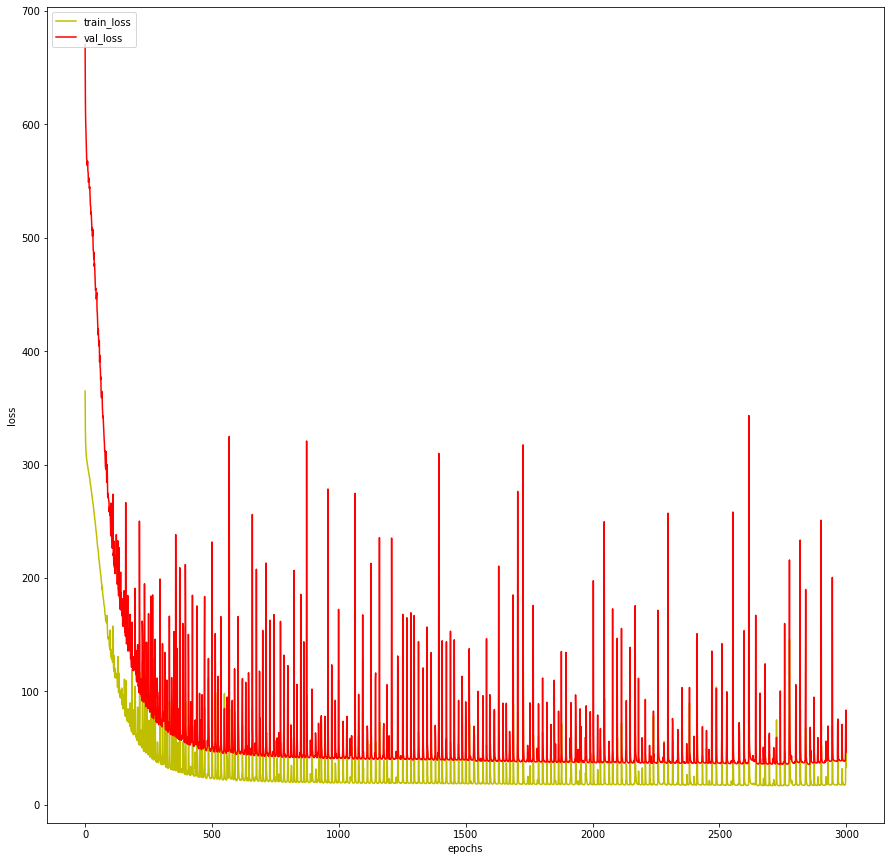

In [174]:
plt.plot(hist.history['loss'], 'y', label='train_loss')
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [15, 15] # [width, height] (inches)
plt.show()


In [175]:
loss, mae = model.evaluate(X_test, Y_test)
print(loss, mae)

4380/4380 [==============================] - 0s 61us/step
51.406350001393385 1.4725366830825806


In [196]:
samples = [randint(0, len(X_test)-1) for _ in range(15)]
pred = model.predict([X_test[samples]])
pred = pred.reshape(-1)
real = Y_test[samples]
real = real.reshape(-1)

In [197]:
res = np.abs(pred - real)
print(np.mean(res), np.max(res), np.min(res))

5.473791807492574 44.43978488445282 0.0


In [198]:
pred

array([ 1.5602151,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  2.9240243, 36.83986  ,  3.7461073,
        0.       ,  0.       , 16.284868 ,  0.       ,  0.       ],
      dtype=float32)

In [199]:
real

array([46, 0, 1.2, 0, 0, 0.5, 0.5, 3, 37.2, 3.6, 18.5, 0.1, 0, 0, 0],
      dtype=object)

In [171]:
model.load_weights('./best_model_20000_80_RMSProp'+'.h5')

In [172]:
loss, mae = model.evaluate(X_test, Y_test)

4380/4380 [==============================] - 0s 70us/step


In [149]:
def build_model(input_shape):
    x = Input(shape=input_shape)

    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(x)
    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(h)
    # h = LSTM(20, activation='tanh', kernel_initializer='he_normal')(h)
    h = LSTM(160, activation='tanh',
             kernel_initializer='he_normal')(x)  # 128

    y = Dense(1, activation='relu')(h)
    return Model(inputs=x, outputs=y)